*   REVANTH SAI BOMMA
*   1/23/SET/BCS/417
*   6AIMLB1
*   DATE: 26/02/2026
*   EXPERIMENT: 06



EMAIL CLASSIFICATION

Training/Testing 80/20


Training with Learning Rate = 0.01

Final Test Metrics:
Accuracy : 0.8333333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[500   0]
 [100   0]]

Training with Learning Rate = 0.005


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Test Metrics:
Accuracy : 0.8333333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[500   0]
 [100   0]]

Training with Learning Rate = 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Test Metrics:
Accuracy : 0.8333333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[500   0]
 [100   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


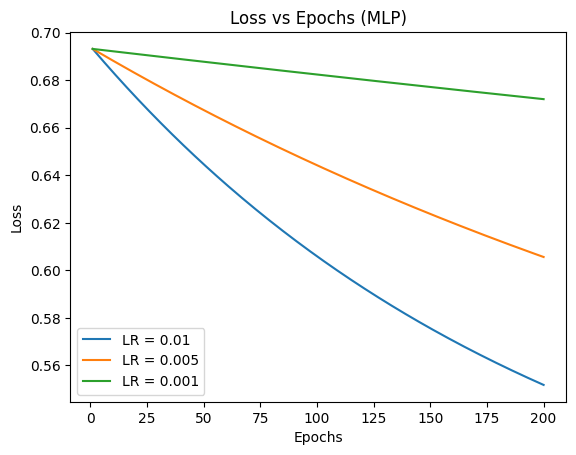

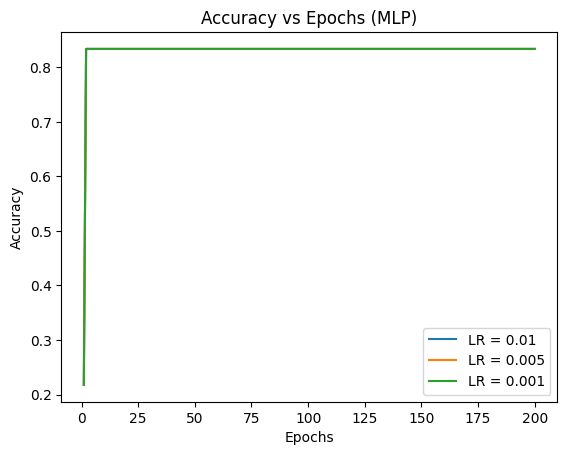

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("/content/spam_or_not_spam.csv")
df.dropna(subset=['email', 'label'], inplace=True)

X = df['email']
y = df['label'].values.reshape(-1,1)

# =========================
# 2. Train-Test Split
# =========================
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 3. TF-IDF
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# =========================
# 4. Network Architecture
# =========================
input_size = X_train.shape[1]
h1 = 64
h2 = 32
output_size = 1
epochs = 200

learning_rates = [0.01, 0.005, 0.001]

# =========================
# Activation Functions
# =========================
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

loss_results = {}
accuracy_results = {}

# =========================
# 5. Train for Each LR
# =========================
for lr in learning_rates:

    print("\n====================================")
    print(f"Training with Learning Rate = {lr}")
    print("====================================")

    np.random.seed(42)

    W1 = np.random.randn(input_size, h1) * 0.01
    b1 = np.zeros((1, h1))

    W2 = np.random.randn(h1, h2) * 0.01
    b2 = np.zeros((1, h2))

    W3 = np.random.randn(h2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):

        # Forward
        Z1 = X_train.dot(W1) + b1
        A1 = relu(Z1)

        Z2 = A1.dot(W2) + b2
        A2 = relu(Z2)

        Z3 = A2.dot(W3) + b3
        A3 = sigmoid(Z3)

        # BCE Loss
        loss = -np.mean(y_train*np.log(A3+1e-9) + (1-y_train)*np.log(1-A3+1e-9))
        loss_list.append(loss)

        # Training Accuracy
        preds_train = (A3 >= 0.5).astype(int)
        acc = accuracy_score(y_train, preds_train)
        accuracy_list.append(acc)

        # Backprop
        dZ3 = A3 - y_train
        dW3 = A2.T.dot(dZ3) / len(X_train)
        db3 = np.sum(dZ3, axis=0, keepdims=True) / len(X_train)

        dA2 = dZ3.dot(W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = A1.T.dot(dZ2) / len(X_train)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_train)

        dA1 = dZ2.dot(W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = X_train.T.dot(dZ1) / len(X_train)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_train)

        # Update
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    loss_results[lr] = loss_list
    accuracy_results[lr] = accuracy_list

    # =========================
    # FINAL TEST EVALUATION
    # =========================
    Z1 = X_test.dot(W1) + b1
    A1 = relu(Z1)

    Z2 = A1.dot(W2) + b2
    A2 = relu(Z2)

    Z3 = A2.dot(W3) + b3
    A3 = sigmoid(Z3)

    test_preds = (A3 >= 0.5).astype(int)

    print("\nFinal Test Metrics:")
    print("Accuracy :", accuracy_score(y_test, test_preds))
    print("Precision:", precision_score(y_test, test_preds))
    print("Recall   :", recall_score(y_test, test_preds))
    print("F1 Score :", f1_score(y_test, test_preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))


# =========================
# 6. Plot Loss Comparison
# =========================
plt.figure()
for lr in learning_rates:
    plt.plot(range(1, epochs+1), loss_results[lr])

plt.title("Loss vs Epochs (MLP)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend([f"LR = {lr}" for lr in learning_rates])
plt.show()


# =========================
# 7. Plot Accuracy Comparison
# =========================
plt.figure()
for lr in learning_rates:
    plt.plot(range(1, epochs+1), accuracy_results[lr])

plt.title("Accuracy vs Epochs (MLP)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend([f"LR = {lr}" for lr in learning_rates])
plt.show()

Training/Testing 70/30


Training with Learning Rate = 0.01

Final Test Metrics:
Accuracy : 0.8233333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[741   0]
 [159   0]]

Training with Learning Rate = 0.005


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Test Metrics:
Accuracy : 0.8233333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[741   0]
 [159   0]]

Training with Learning Rate = 0.001


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Final Test Metrics:
Accuracy : 0.8233333333333334
Precision: 0.0
Recall   : 0.0
F1 Score : 0.0
Confusion Matrix:
 [[741   0]
 [159   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


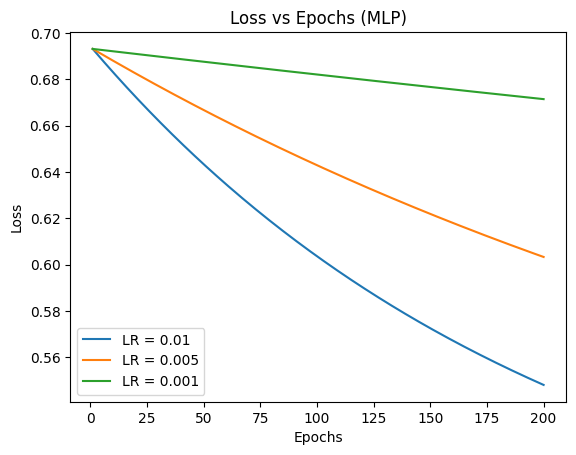

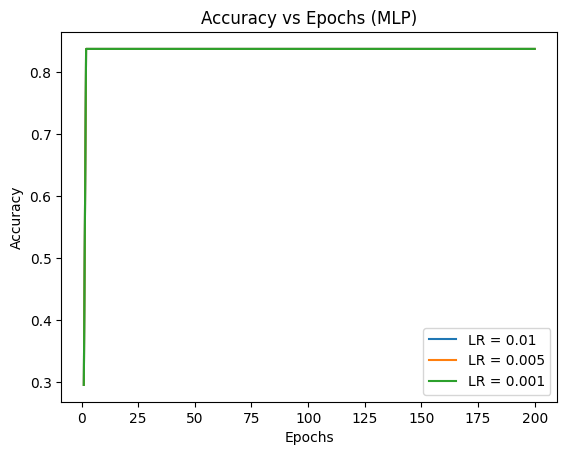

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("/content/spam_or_not_spam.csv")
df.dropna(subset=['email', 'label'], inplace=True)

X = df['email']
y = df['label'].values.reshape(-1,1)

# =========================
# 2. Train-Test Split
# =========================
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================
# 3. TF-IDF
# =========================
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_train = vectorizer.fit_transform(X_train_text).toarray()
X_test = vectorizer.transform(X_test_text).toarray()

# =========================
# 4. Network Architecture
# =========================
input_size = X_train.shape[1]
h1 = 64
h2 = 32
output_size = 1
epochs = 200

learning_rates = [0.01, 0.005, 0.001]

# =========================
# Activation Functions
# =========================
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

loss_results = {}
accuracy_results = {}

# =========================
# 5. Train for Each LR
# =========================
for lr in learning_rates:

    print("\n====================================")
    print(f"Training with Learning Rate = {lr}")
    print("====================================")

    np.random.seed(42)

    W1 = np.random.randn(input_size, h1) * 0.01
    b1 = np.zeros((1, h1))

    W2 = np.random.randn(h1, h2) * 0.01
    b2 = np.zeros((1, h2))

    W3 = np.random.randn(h2, output_size) * 0.01
    b3 = np.zeros((1, output_size))

    loss_list = []
    accuracy_list = []

    for epoch in range(epochs):

        # Forward
        Z1 = X_train.dot(W1) + b1
        A1 = relu(Z1)

        Z2 = A1.dot(W2) + b2
        A2 = relu(Z2)

        Z3 = A2.dot(W3) + b3
        A3 = sigmoid(Z3)

        # BCE Loss
        loss = -np.mean(y_train*np.log(A3+1e-9) + (1-y_train)*np.log(1-A3+1e-9))
        loss_list.append(loss)

        # Training Accuracy
        preds_train = (A3 >= 0.5).astype(int)
        acc = accuracy_score(y_train, preds_train)
        accuracy_list.append(acc)

        # Backprop
        dZ3 = A3 - y_train
        dW3 = A2.T.dot(dZ3) / len(X_train)
        db3 = np.sum(dZ3, axis=0, keepdims=True) / len(X_train)

        dA2 = dZ3.dot(W3.T)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = A1.T.dot(dZ2) / len(X_train)
        db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_train)

        dA1 = dZ2.dot(W2.T)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = X_train.T.dot(dZ1) / len(X_train)
        db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_train)

        # Update
        W3 -= lr * dW3
        b3 -= lr * db3
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    loss_results[lr] = loss_list
    accuracy_results[lr] = accuracy_list

    # =========================
    # FINAL TEST EVALUATION
    # =========================
    Z1 = X_test.dot(W1) + b1
    A1 = relu(Z1)

    Z2 = A1.dot(W2) + b2
    A2 = relu(Z2)

    Z3 = A2.dot(W3) + b3
    A3 = sigmoid(Z3)

    test_preds = (A3 >= 0.5).astype(int)

    print("\nFinal Test Metrics:")
    print("Accuracy :", accuracy_score(y_test, test_preds))
    print("Precision:", precision_score(y_test, test_preds))
    print("Recall   :", recall_score(y_test, test_preds))
    print("F1 Score :", f1_score(y_test, test_preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))


# =========================
# 6. Plot Loss Comparison
# =========================
plt.figure()
for lr in learning_rates:
    plt.plot(range(1, epochs+1), loss_results[lr])

plt.title("Loss vs Epochs (MLP)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend([f"LR = {lr}" for lr in learning_rates])
plt.show()


# =========================
# 7. Plot Accuracy Comparison
# =========================
plt.figure()
for lr in learning_rates:
    plt.plot(range(1, epochs+1), accuracy_results[lr])

plt.title("Accuracy vs Epochs (MLP)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend([f"LR = {lr}" for lr in learning_rates])
plt.show()